В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:

# імпортуємо бібліотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/roldugina/Machine_learning_course/main/cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


#**Завдання 2.** Типи даних

Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
# загальна кількість колонок в датафреймі

df.shape[1]

13

In [5]:
# кількість числових колонок в датафреймі

df.select_dtypes(include = ['number']).shape[1]

8

Подивимось унікальні значення в кожній з колонок типу `object`

In [6]:
df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [7]:
df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [8]:
df.Model.nunique()

58

In [9]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [10]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

В наборі даних 13 колонок, з них 8 числових (враховуючи Cad_ID, який в цілях оптимізації можна змінити на str) та 5 категоріальних. З категоріальних:
10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в якій можна встановити відношення порядку (First / Second / Third)

#**Завдання 3**. Розділіть дані на тренувальні і тест.

Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [12]:
inputs = df.drop('Price',axis = 1)
targets = df['Price']
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.1, random_state = 12)

#**Завдання 4**.Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
pd.set_option('display.max_columns', 100)

Визначаємо кількість унікальних значень по колонкам Fuel_Type та Transmission для кодування

In [14]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [15]:
df['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [16]:

# кодування бінарних категоріальних колонок

fuel_type_codes = {'Diesel': 0, 'Petrol':1 }
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Fuel_Type_Code'] = df.Fuel_Type.map(fuel_type_codes)
X_train['Transmission_Code'] = df.Transmission.map(transmission_codes)
X_test['Fuel_Type_Code'] = df.Fuel_Type.map(fuel_type_codes)
X_test['Transmission_Code'] = df.Transmission.map(transmission_codes)
display(X_train.head()),display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code
12,13,Hyundai,Creta,2019,22000,Petrol,Manual,Third,16,1497,113,5,1,0
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,0,1
39,40,Toyota,Yaris,2020,18000,Petrol,Manual,First,17,1496,106,5,1,0
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,0,1
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,1,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


(None, None)

In [17]:
def one_hot_transform(X, enc, col):
  one_hot = enc.transform(X[[col]]).toarray()
  X[enc.categories_[0]] = one_hot
  display(X.head())

In [18]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])

one_hot_transform(X_train, enc, 'Brand')
one_hot_transform(X_test, enc, 'Brand')

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
12,13,Hyundai,Creta,2019,22000,Petrol,Manual,Third,16,1497,113,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,40,Toyota,Yaris,2020,18000,Petrol,Manual,First,17,1496,106,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:

# кодування категоріальних колонок з відношенням порядку

from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [20]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
12,13,Hyundai,Creta,2019,22000,Petrol,Manual,Third,16,1497,113,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,40,Toyota,Yaris,2020,18000,Petrol,Manual,First,17,1496,106,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

#**Завдання 5.** Кореляційний аналіз

Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [21]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
12,13,Hyundai,Creta,2019,22000,Petrol,Manual,Third,16,1497,113,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,40,Toyota,Yaris,2020,18000,Petrol,Manual,First,17,1496,106,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# функція видалення нечислових колонок та перетворення індекса в тип str

def clean_data(df,col_list):
  df.drop(col_list,axis = 1, inplace = True)
  df['Car_ID'].astype('str')
  display(df.head())

In [23]:
col_delete_list = X_train.select_dtypes('object').columns
clean_data(X_train, col_delete_list)
clean_data(X_test, col_delete_list)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
12,13,2019,22000,16,1497,113,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,9,2017,30000,18,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,40,2020,18000,17,1496,106,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,2019,20000,20,1995,190,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,2020,25000,18,999,76,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
print(X_train.shape,y_train.shape)

(90, 21) (90,)


In [25]:
train = X_train.copy()
train['y'] = y_train
train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,y
12,13,2019,22000,16,1497,113,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,850000
8,9,2017,30000,18,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200000
39,40,2020,18000,17,1496,106,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,650000
9,10,2019,20000,20,1995,190,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2700000
7,8,2020,25000,18,999,76,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,650000


In [26]:

# побудування матриці кореляції

train_corr = train.select_dtypes('number').corr()

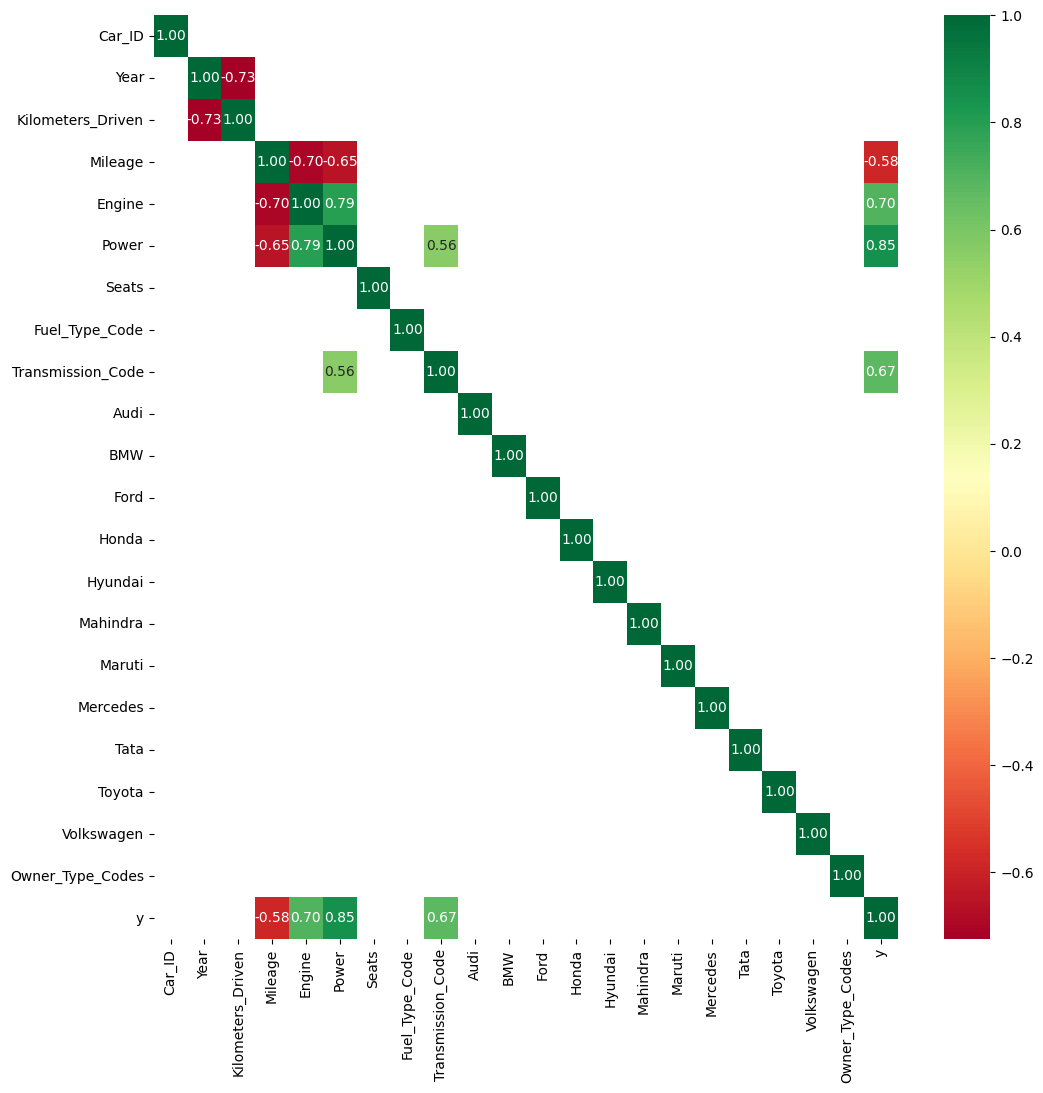

In [27]:
# heatmap з матрицею кореляції (виведені значення, які більше 0.5 за абсолютним значенням)

plt.figure(figsize = (12,12))
sns.heatmap(data = train_corr[(train_corr>0.5) | (train_corr<-0.5)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

**Висновок**

За даними кореляційного аналізу, на цільову змінну найбільший вплив мають 4 чинники:

1. `Mileage` (негативний вплив, коефіцієнт кореляції -0.58). Це єдиний чинник, який має негативний вплив на таргет.
1. `Engine` (коефіцієнт кореляції 0.7)
1. `Power` (коефіцієнт кореляції 0.85)
1. `Transmission_Code` (коефіцієнт кореляції 0.67)

#**Завдання 6**. Тренуємо лінійну регресію.

0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [28]:
# функція прогнозування та візуалізації даних

def plot_print_rmse(y, y_predict, str):

  rmse = mean_squared_error(y, y_predict, squared = False)
  print(f'{str} loss: {rmse}')
  plt.scatter(y,y_predict, color = 'blue', s = 5, label = 'Truth Values vs Predicted Values')

  x_line_max = y.max() if (y.max()>y_predict.max()) else y_predict.max()
  x_line = np.linspace(0,x_line_max, 100)
  plt.plot(x_line,x_line, color = 'red', label = 'Truth Values = Predicted Values')

  plt.title(f'Comparison of Truth and Predicted Values. {str} Set')
  plt.xlabel('Truth Values')
  plt.ylabel('Predicted Values')
  plt.legend()
  plt.grid(True)
  plt.show()

  return rmse

Коефіцієнти регресії: (4703460.70625735, array([-1.53029171e+03, -8.51819650e+00, -4.15964081e+04, -4.00149336e+00,
        5.90939081e+03, -1.18783775e+04, -3.46129673e+05,  2.54040747e+05,
        7.05997104e+05,  7.33515176e+05, -3.04822129e+05, -1.56790779e+05,
       -4.67698233e+05, -5.31221684e+05, -3.82109870e+05,  7.13334460e+05,
       -1.19027213e+05,  1.80396456e+04, -2.09216478e+05,  6.07316649e+04]))

Training loss: 218563.91597783225


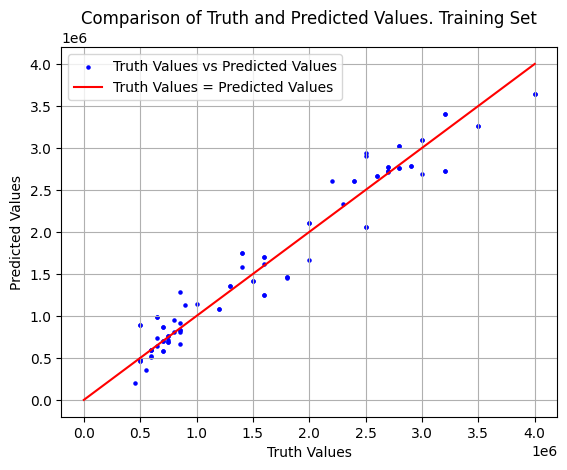

In [29]:

# тренуємо модель на трейнінг сеті

model1_sk = LinearRegression()
model1_sk.fit(X_train.drop(columns = 'Car_ID'),y_train)
print(f'Коефіцієнти регресії: {model1_sk.intercept_, model1_sk.coef_}\n')
y_train_predict_model1_sk = model1_sk.predict(X_train.drop(columns = 'Car_ID'))
rmse_train_model1_sk = plot_print_rmse(y_train, y_train_predict_model1_sk, 'Training')

Test loss: 191731.39155889297


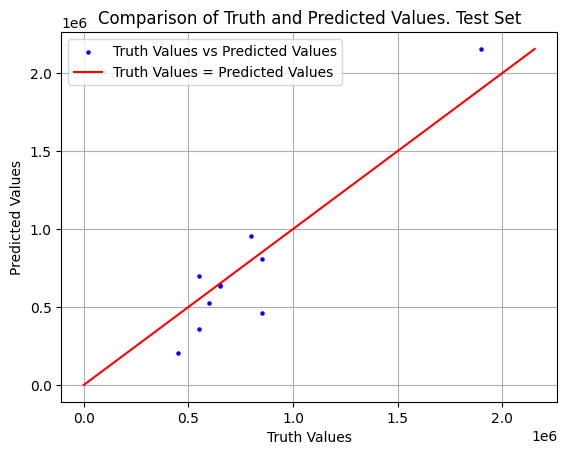

In [30]:
# запускаємо модель на тестовому сеті
y_test_model1_sk = model1_sk.predict(X_test.drop(columns = 'Car_ID'))

rmse_test_model1_sk = plot_print_rmse(y_test, y_test_model1_sk, 'Test')

In [31]:
y_train.std()

1008894.4332922498

**Висновки**

1. В цілому можна вважати модель непоганою (Test loss нижче, ніж Training loss), і вони обидві значно нижче, ніж стандартне відхилення y.
1. З діаграми розсіяння передбачень проти реальних даних на тестовому сеті видно, що є дані з значним відхиленням. Але тестова вибірка дуже мала, щоб робити зважене рішення.
1. Щоб прийняти рішення щодо моделі, можна ще проаналізувати залишки на нормальність (провести статистичні тести та побудувати QQ-plot), а також розрахувати інші показники якості моделі.

#**Завдання 7**. Аналіз впливу чинників на цільову змінну

Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [32]:
X_train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
12,13,2019,22000,16,1497,113,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,9,2017,30000,18,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,40,2020,18000,17,1496,106,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,2019,20000,20,1995,190,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,2020,25000,18,999,76,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# підготовка до скейлінгу даних

numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage','Engine','Power', 'Seats']
cat_cols = ['Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Honda','Hyundai','Mahindra','Maruti','Mercedes','Tata','Toyota','Volkswagen','Owner_Type_Codes']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [34]:
# функція, що формує датафрейм з масштабованими даними

def scale_transform(inputs, numeric_cols, categorical_cols, id_col):

  scaled_num_inputs = scaler.transform(inputs[numeric_cols])
  cat_inputs = inputs[categorical_cols].values
  id_inputs = np.expand_dims(inputs[id_col].values.astype('str'), axis = 1)

  inputs_scaled = pd.DataFrame(np.concatenate((id_inputs, scaled_num_inputs, cat_inputs), axis = 1), columns = [id_col]+numeric_cols+cat_cols)
  #inputs_scaled = pd.DataFrame(np.concatenate((scaled_num_inputs, cat_inputs), axis = 1), columns = numeric_cols+cat_cols)

  return inputs_scaled

In [35]:
# масштабування трейнінг сету

X_train_scaled = scale_transform(X_train, numeric_cols, cat_cols,'Car_ID')
X_train_scaled.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,13,0.5147572266207943,-0.6649810092928591,-0.30429030972509225,-0.6468346278614718,-0.657191370335972,-0.30667556803682655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,9,-1.2334748637892405,0.2055395846905203,0.30429030972509225,0.09242986054639532,0.29121481090727264,-0.30667556803682655,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,1.3888732718258117,-1.1002413062845486,0.0,-0.6484041915311276,-0.7469054685616844,-0.30667556803682655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10,0.5147572266207943,-0.8826111577887038,0.9128709291752768,0.13480807962710106,0.3296637101468637,-0.30667556803682655,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,1.3888732718258117,-0.3385357865490918,0.30429030972509225,-1.4284773353500446,-1.1313944609575943,-0.30667556803682655,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Коефіцієнти регресії: (1569086.7934307065, array([  -1750.67340254,  -78281.4013196 , -136699.7460522 ,
         -2549.43041423,  461084.00429658,   -9037.63361962,
       -346129.67322359,  254040.74683739,  705997.10416846,
        733515.17565321, -304822.1289025 , -156790.77893526,
       -467698.23285258, -531221.6841611 , -382109.86964804,
        713334.45979778, -119027.21277271,   18039.6456087 ,
       -209216.47795595,   60731.66485104]))

Training loss: 218563.91597783222


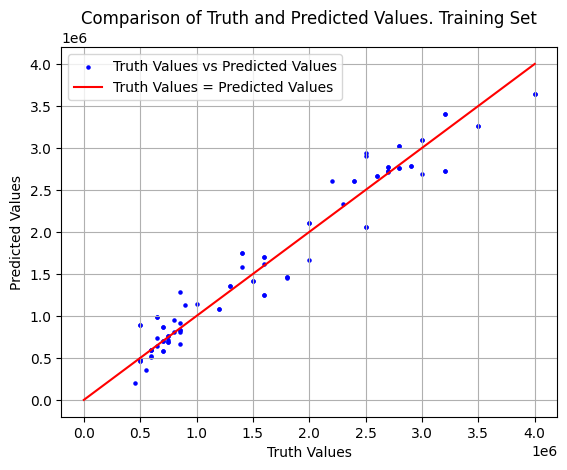

In [36]:
# навчання та запуск моделі на масштабованому трейнінг сеті

model2_sk = LinearRegression()
model2_sk.fit(X_train_scaled.drop(columns = 'Car_ID'),y_train)
print(f'Коефіцієнти регресії: {model2_sk.intercept_, model2_sk.coef_}\n')
y_train_predict_model2_sk = model2_sk.predict(X_train_scaled.drop(columns = 'Car_ID'))

rmse_train_model2_sk = plot_print_rmse(y_train,y_train_predict_model2_sk, 'Training')

Test loss: 191731.39155889355


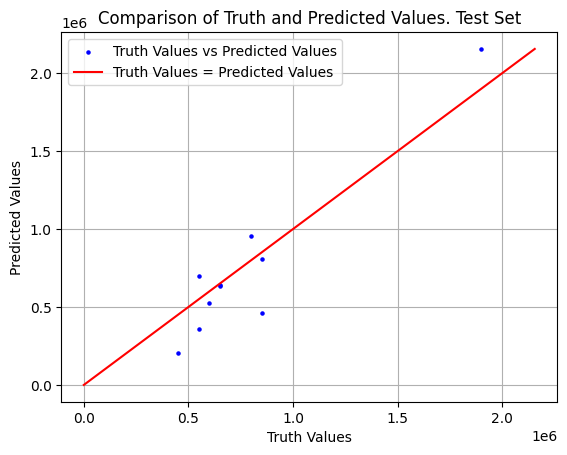

In [37]:
# масштабування тестового сету; запуск моделі на тестовому сеті

X_test_scaled = scale_transform(X_test, numeric_cols, cat_cols, 'Car_ID')

y_test_predict_model2_sk = model2_sk.predict(X_test_scaled.drop(columns = 'Car_ID'))

rmse_test_model2_sk = plot_print_rmse(y_test, y_test_predict_model2_sk, 'Test')

In [38]:
# вивід коефіцієнтів регресії, відсортованих за зменшенням абсолютного значення

weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model2_sk.coef_, model2_sk.intercept_)
})
weights_df['weight'] = weights_df['weight'].apply(lambda x: '{:.2f}'.format(x)).astype('float')
weights_df['abs_weight'] = abs(weights_df['weight'])

weights_df.sort_values('abs_weight', ascending=False)

,feature,weight,abs_weight
20,1,1569086.79,1569086.79
9,BMW,733515.18,733515.18
15,Mercedes,713334.46,713334.46
8,Audi,705997.10,705997.10
13,Mahindra,-531221.68,531221.68
12,Hyundai,-467698.23,467698.23
4,Power,461084.00,461084.00
14,Maruti,-382109.87,382109.87
6,Fuel_Type_Code,-346129.67,346129.67
10,Ford,-304822.13,304822.13


**Висновки**

* Чинники, які максимально впливають на ціну авто, це здебільшого її марка. Приналежність до топ та преміум сегменту (Mercedes, BMW, Audi) впливає позитивно. Приналежність до місцевого масс-маркету (Mahindra, Tata) - негативно.
* Серед чинників, не пов'язаних з маркою авто, найбільший вплив має тип трансмісії. Автівки з автоматичною КП коштують дорожче, що цілком логічно.
* Mileage, Kilometres_Driven, Year впливають негативно на ціну, що теж логічно. Нові машини з невеликим пробігом дорожче, ніж старі.
* вплив Fuel_Type_Code негативний, тобто автівки, які використовують бензин, коштують дорожче, ніж на дизелі (напевно тому, що це в принципі більш дорогі марки авто).



#**Завдання 8.** Тренуємо модель з statsmodels

На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [39]:
# підготовка вхідних даних та навчання моделі

y = np.expand_dims(y_train, axis = 1)
X = X_train_scaled.drop(columns = 'Car_ID').astype('float')
X = sm.add_constant(X)

model1_ols = sm.OLS(y,X)
results1_ols = model1_ols.fit()
results1_ols.params

const                1.438330e+06
Year                -1.750673e+03
Kilometers_Driven   -7.828140e+04
Mileage             -1.366997e+05
Engine              -2.549430e+03
Power                4.610840e+05
Seats               -9.037634e+03
Fuel_Type_Code      -3.461297e+05
Transmission_Code    2.540407e+05
Audi                 8.367543e+05
BMW                  8.642724e+05
Ford                -1.740649e+05
Honda               -2.603355e+04
Hyundai             -3.369410e+05
Mahindra            -4.004645e+05
Maruti              -2.513526e+05
Mercedes             8.440917e+05
Tata                 1.173002e+04
Toyota               1.487969e+05
Volkswagen          -7.845925e+04
Owner_Type_Codes     6.073166e+04
dtype: float64

In [40]:
print(results1_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     73.95
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.02e-38
Time:                        09:08:50   Log-Likelihood:                -1234.2
No. Observations:                  90   AIC:                             2508.
Df Residuals:                      70   BIC:                             2558.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.438e+06   6.62e+0

Test loss: 191731.39155889224


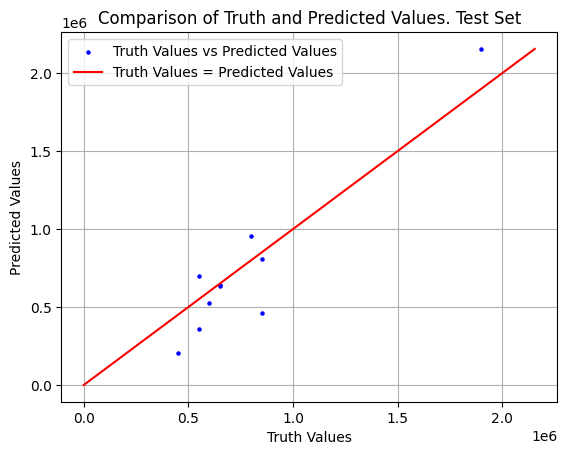

191731.39155889224

In [41]:
# підготовка вхідних даних тестового сету та прогнозування

y_test_ols = np.expand_dims(y_test, axis = 1)
X_test_m1_ols = X_test_scaled.drop(columns = 'Car_ID').astype('float')
X_test_m1_ols = sm.add_constant(X_test_m1_ols)
y_test_predict_model1_ols = results1_ols.predict(X_test_m1_ols)
plot_print_rmse(y_test_ols, y_test_predict_model1_ols, 'Test')

In [42]:
# перевірка статистичної значущості коефіцієнтів регресії

alpha = 0.05
pval = results1_ols.pvalues
pval[pval<alpha]

const                7.976980e-33
Mileage              1.220813e-02
Power                2.900058e-09
Fuel_Type_Code       1.104239e-04
Transmission_Code    3.898724e-03
Audi                 8.007260e-12
BMW                  1.478850e-12
Hyundai              1.674562e-03
Mahindra             2.020298e-03
Maruti               3.433374e-02
Mercedes             7.932014e-13
dtype: float64

**Висновки**

* за результатами статистичного тесту, статистично значущими на рівні 0.05 є такі коефіцієнти: Mileage, Power, Fuel_Type_Code, Transmission_Code, Audi, BMW,
Hyundai, Mahindra, Maruti, Mercedes.


#**Завдання 9**. Покращення моделі

Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [43]:
significant_regressors = pval[pval<alpha].index[1:(len(pval)-1)]

X = X_train[significant_regressors]
X = sm.add_constant(X)
model2_ols = sm.OLS(y,X)
results2_ols = model2_ols.fit()
results2_ols.params

const                1.166662e+06
Mileage             -4.045215e+04
Power                5.481372e+03
Fuel_Type_Code      -2.622928e+05
Transmission_Code    2.572167e+05
Audi                 8.614491e+05
BMW                  1.018494e+06
Hyundai             -2.894208e+05
Mahindra            -2.810713e+05
Maruti              -1.600935e+05
Mercedes             9.345123e+05
dtype: float64

In [44]:
print(results2_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 31 May 2024   Prob (F-statistic):           5.47e-46
Time:                        09:08:51   Log-Likelihood:                -1239.5
No. Observations:                  90   AIC:                             2501.
Df Residuals:                      79   BIC:                             2528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.167e+06   2.47e+0

**Висновки**

1. Після запуска моделі тільки з статистично значущими ознаками показники R2 та R2 скоригований трохи зменшились. Але в обох випадках вони дуже близькі до 1.

1. У моделі дуже великий коефіцієнт обумовленості Cond. No = 1.75 e+03. Це може свідчити про проблеми (мультиколінеарність, тобто залежність показників).
-

#**Завдання 10**. Покращення моделі, продовження

Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [45]:
regressors = pval[pval<0.25].index[1:(len(pval)-1)]
regressors

Index(['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Code',
       'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Toyota'],
      dtype='object')

In [46]:
X = X_train[regressors]
X = sm.add_constant(X)
model3_ols = sm.OLS(y,X)
results3_ols = model3_ols.fit()
results3_ols.params

const                1.339155e+06
Kilometers_Driven   -7.288413e+00
Mileage             -3.969614e+04
Power                5.757107e+03
Fuel_Type_Code      -3.103814e+05
Transmission_Code    2.482999e+05
Audi                 8.764126e+05
BMW                  9.529899e+05
Ford                -8.390830e+04
Hyundai             -2.450048e+05
Mahindra            -3.288272e+05
Maruti              -1.739828e+05
Mercedes             9.048317e+05
Toyota               1.848915e+05
dtype: float64

In [47]:
print(results3_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     115.6
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.73e-44
Time:                        09:08:51   Log-Likelihood:                -1234.9
No. Observations:                  90   AIC:                             2498.
Df Residuals:                      76   BIC:                             2533.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.339e+06   3.07e+0

**Висновки**

1. Вибірка дуже маленька для прийняття остаточного рішення щодо вибору моделі.
1. Виходячи з розрахунків, я б прийняла рішення залишити останній варіант моделі (з пом'якшеним критерієм щодо регресорів), тому що:
* максимальний показник скоригованого R2;
* мінімальне значення критерію AIC;
* можливо, на більшому обсязі даних зміниться рівень значущості чинників, тому хочеться поки максимально зберігти дані.